# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
from matplotlib.ticker import PercentFormatter

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Loading Amazon dataset 
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df = data.copy()

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
print(df.shape)
df.columns

(2443651, 9)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1370545.35,816056.17,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.15,2.19,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,480.63,5944.12,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,89.24,345.61,0.0,9.99,19.09,45.99,100000.0
boughtInLastMonth,2443651.0,25.90,240.48,0.0,0.00,0.00,0.00,50000.0


In [7]:
n_rows = df.shape[0]
n_columns = df.shape[1]

In [8]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [9]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:

In [10]:
# Generate a frequency table for the product `category`.
category_frequency = df.category.value_counts()
category_proportion = df.category.value_counts(normalize=True).round(2)

In [11]:
# merging absoluty frequency with relative frequenceies
category_df = pd.concat([category_frequency, category_proportion], axis=1)
category_df.columns = ['absolute_frequency', 'relative_frequency']
category_df

,absolute_frequency,relative_frequency
category,,
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Alexa Built-In Devices,107,0.00
Motorbike Chassis,107,0.00
Plugs,107,0.00


In [12]:
category_total_absolute = int(category_frequency.sum())
category_total_relative = float(category_proportion.sum())

total_row = pd.DataFrame({
    'absolute_frequency': [category_total_absolute],
    'relative_frequency': [category_total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,2443651,0.54


In [13]:
category_df2 = pd.concat([category_df,total_row])
category_df2

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01
...,...,...
Motorbike Chassis,107,0.00
Plugs,107,0.00
Smart Home Security & Lighting,104,0.00
Smart Speakers,54,0.00


In [14]:
category_df = category_df.reset_index()
#category_df = category_df.drop(columns=["level_0"])
category_df

,category,absolute_frequency,relative_frequency
0,Sports & Outdoors,836265,0.34
1,Beauty,19312,0.01
2,"Handmade Clothing, Shoes & Accessories",19229,0.01
3,Bath & Body,19092,0.01
4,Birthday Gifts,18978,0.01
...,...,...,...
291,Alexa Built-In Devices,107,0.00
292,Motorbike Chassis,107,0.00
293,Plugs,107,0.00
294,Smart Home Security & Lighting,104,0.00


In [15]:
# Which are the top 5 most listed product categories?
top_five_categories = category_df.head(5)
print(top_five_categories)

                                 category  absolute_frequency  \
0                       Sports & Outdoors              836265   
1                                  Beauty               19312   
2  Handmade Clothing, Shoes & Accessories               19229   
3                             Bath & Body               19092   
4                          Birthday Gifts               18978   

   relative_frequency  
0                0.34  
1                0.01  
2                0.01  
3                0.01  
4                0.01  


2. **Visualizations**:

In [16]:
print(list(top_five_categories["category"]))

['Sports & Outdoors', 'Beauty', 'Handmade Clothing, Shoes & Accessories', 'Bath & Body', 'Birthday Gifts']


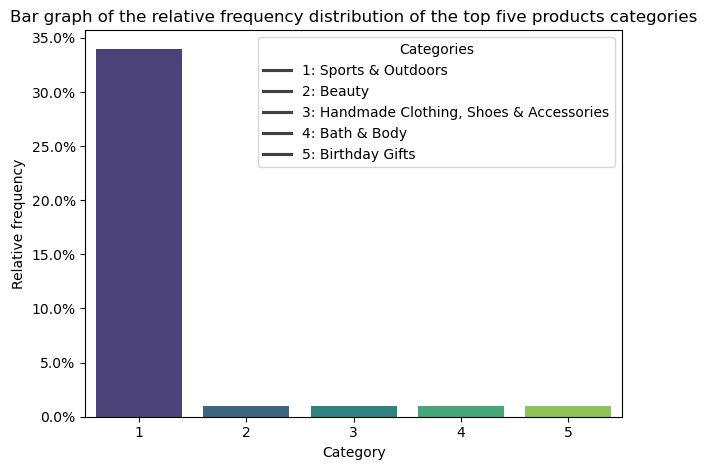

In [17]:
"""
- Display the distribution of products across different categories using a bar chart. 
*If you face problems understanding the chart, do it for a subset of top categories.*
"""

from matplotlib.ticker import PercentFormatter

# Dictionary for category mapping
category_mapping = {
    1: 'Sports & Outdoors',
    2: 'Beauty',
    3: 'Handmade Clothing, Shoes & Accessories',
    4: 'Bath & Body',
    5: 'Birthday Gifts'
}

# Plot
sns.barplot(
    x="category",
    hue="category",
    y="relative_frequency",
    data=top_five_categories,
    palette='viridis',
    dodge=False  # Ensure the bars for each category are not split due to the hue
)

# Customize the axis titles and plot title
plt.xlabel("Category")
plt.ylabel("Relative frequency")
plt.title("Bar graph of the relative frequency distribution of the top five products categories")

# Set x-axis ticks to show only the keys
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=list(category_mapping.keys()))

# Apply percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Customize the legend to show both key and value
category_labels = [f"{key}: {value}" for key, value in category_mapping.items()]
legend = plt.legend(
    title='Categories',
    labels=category_labels  # Update legend text
)

# Update legend text to show both key and value
for key, label in zip(category_mapping.keys(), category_labels):
    legend.get_texts()[key - 1].set_text(label)

# Use tight layout to avoid layout issues
plt.tight_layout()

# Show the plot
plt.show()

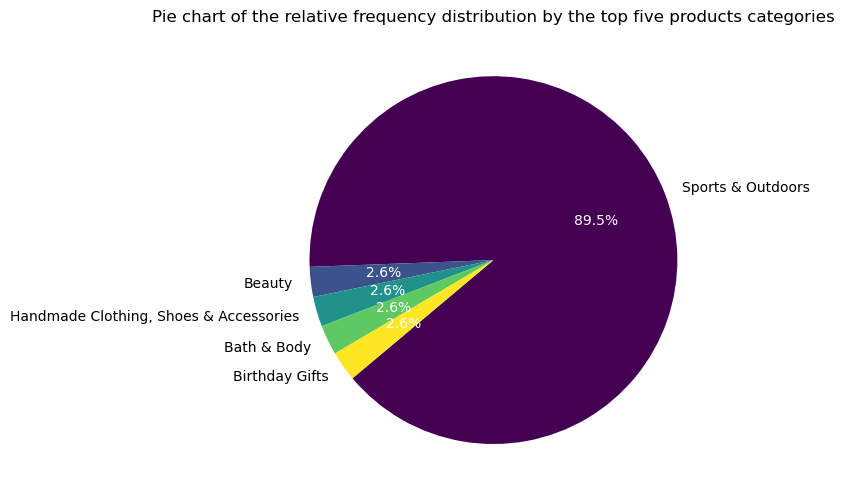

In [18]:
"""
- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

    Sports & Outdoors dominates the list of the top categories of products
"""

# Dictionary for category mapping
category_mapping = {
    1: 'Sports & Outdoors',
    2: 'Beauty',
    3: 'Handmade Clothing, Shoes & Accessories',
    4: 'Bath & Body',
    5: 'Birthday Gifts'
}

# Plot a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the plot
wedges, texts, autotexts = plt.pie(
    top_five_categories['relative_frequency'],
    labels=top_five_categories['category'].astype(str),  # Show category keys on the chart
    autopct='%1.1f%%',  # Display percentage on the pie slices
    startangle=-140,     # Start the pie at a better angle
    colors=plt.cm.viridis(np.linspace(0, 1, len(top_five_categories)))  # Use a color map and space colors
)

# Format the autotexts for better readability
for autotext in autotexts:
    autotext.set_color('white')
    #autotext.set_weight('bold')

# Add a title
plt.title("Pie chart of the relative frequency distribution by the top five products categories")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:

In [19]:
""" 
- Calculate the mean, median, and mode for the `price` of products.
"""

round(df.price.describe(), 2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [20]:
""""  
- What's the average price point of products listed? How does this compare with the most common price point (mode)?
"""

price_mean   = round(df["price"].mean(), 2)
price_median = round(df["price"].median(), 2)
price_mode   = round(df["price"].mode(), 2)

print(f"The mean price is ${price_mean}, the median price is ${price_median}, and the mode price is ${price_mode}")
    
print(f"The mean is larger the median, thus the distribution of price is positively skewed or skewed to the right")



The mean price is $89.24, the median price is $19.09, and the mode price is $0    9.99
Name: price, dtype: float64
The mean is larger the median, thus the distribution of price is positively skewed or skewed to the right


2. **Measures of Dispersion**:

In [21]:
"""  
- Determine the variance, standard deviation, range, and interquartile range for product `price`.
"""
price_std = round(df["price"].std(), 2) 
price_var = round(df["price"].var(), 2) 

print(f"The standard deviation of the price series is ${price_std}, its variance is {price_var}")

The standard deviation of the price series is $345.61, its variance is 119445.49


In [22]:
""" 
- How varied are the product prices? Are there any indicators of a significant spread in prices?
"""
price_sk = round(df["price"].skew(), 2)

price_k = round(df["price"].kurtosis(), 2)

print(f"The skewness is {price_sk} > 0. The distribution of the prices is positively skewed (right-skewed). There is a large bulk of data concentrated on the left side of the distribution.")
print(f"The kurtosis is {price_k} > 3. The distribution of the prices is heavier in the rails and has a sharper peak compared to a normal distribution. This means that there are more outliers than in a normally distributed set")

The skewness is 27.49 > 0. The distribution of the prices is positively skewed (right-skewed). There is a large bulk of data concentrated on the left side of the distribution.
The kurtosis is 4241.62 > 3. The distribution of the prices is heavier in the rails and has a sharper peak compared to a normal distribution. This means that there are more outliers than in a normally distributed set


3. **Visualizations**:

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


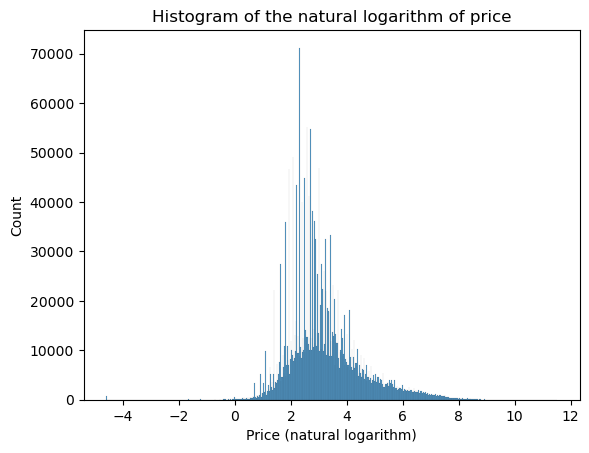

In [23]:
""" 
- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
*If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
"""
df['price_natural_log'] = np.log(df['price'])
sns.histplot(df.price_natural_log, bins="auto")

# Customize the axis titles and plot title
plt.xlabel("Price (natural logarithm)")
plt.ylabel("Count")
plt.title("Histogram of the natural logarithm of price")

plt.show()

# It's hard to read these diagram because of the count distribution of each price. 
# It's easier if we use the natural logarithm of the price series.

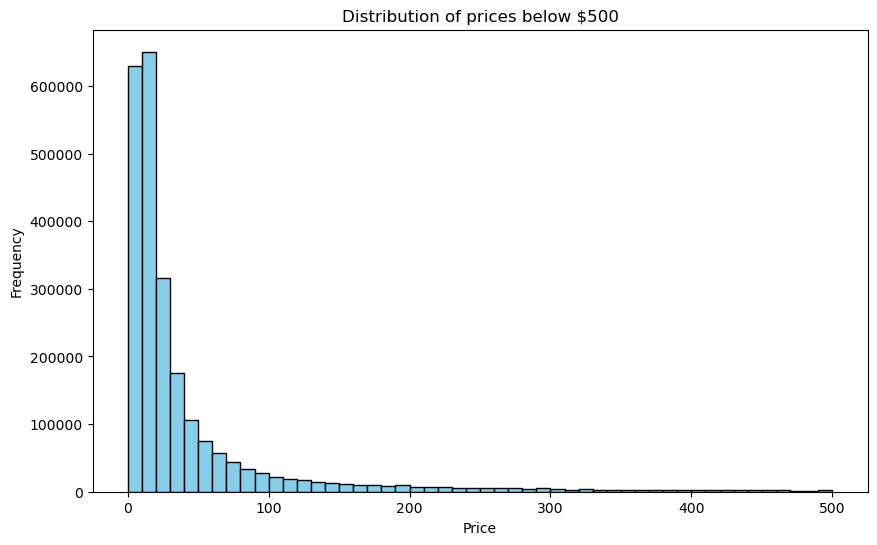

Number of prices above or equal to $500: 87551


In [24]:
# Filter prices less than 500 for the histogram
prices_below_500 = df[df['price'] < 500]['price']

# Count prices 500 and above
prices_above_500_count = (df['price'] >= 500).sum()

# Plot the histogram for prices below 500
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(prices_below_500, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of prices below $500')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

# Print the count of prices above 500
print(f"Number of prices above or equal to $500: {prices_above_500_count}")

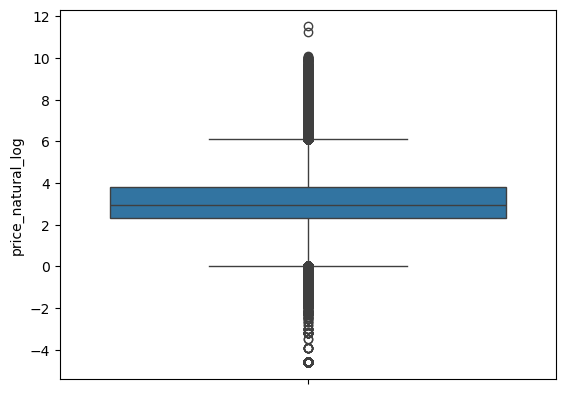

In [25]:
""" 
- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 
"""
sns.boxplot(data=df.price_natural_log)
plt.show()

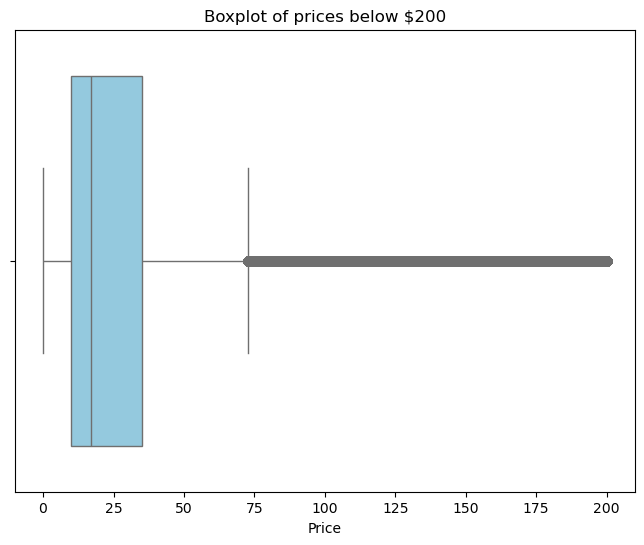

Number of prices above or equal to $200: 194243


In [26]:
# Filter prices less than 200 for the boxplot
prices_below_200 = df[df['price'] < 200]['price']

# Count prices 200 and above
prices_above_200_count = (df['price'] >= 200).sum()

# Plot the boxplot for prices below 200
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.boxplot(x=prices_below_200, color='skyblue')
plt.title('Boxplot of prices below $200')
plt.xlabel('Price')

# Display the boxplot
plt.show()

# Print the number of prices above 200
print(f"Number of prices above or equal to $200: {prices_above_200_count}")

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:

In [27]:
""" 
- Calculate the mean, median, and mode for the `rating` of products.
"""
stars_mean   = round(df["stars"].mean(), 2)
stars_median = round(df["stars"].median(), 2)
stars_mode   = round(df["stars"].mode(), 2)
stars_min = round(df["stars"].min(), 2)
stars_max = round(df["stars"].max(), 2)

print(f"The mean rating is {stars_mean} stars, the median rating is {stars_median} stars, and the mode rating is {stars_mode}")
print(f"The mean is larger the median, thus the distribution of ratings is positively skewed or skewed to the right")
print(f"The ratings range between {stars_min} and {stars_min}, however most people gives {stars_mode} stars")

The mean rating is 2.15 stars, the median rating is 0.0 stars, and the mode rating is 0    0.0
Name: stars, dtype: float64
The mean is larger the median, thus the distribution of ratings is positively skewed or skewed to the right
The ratings range between 0.0 and 0.0, however most people gives 0    0.0
Name: stars, dtype: float64 stars


2. **Measures of Dispersion**:

In [28]:
"""  
- Determine the variance, standard deviation, and interquartile range for product `rating`.
"""
stars_std = round(df["stars"].std(), 2)
stars_var = round(df["stars"].var(), 2)
stars_q1 = round(df["stars"].quantile(0.25), 2)
stars_q3 = round(df["stars"].quantile(0.75), 2)
stars_iqr = stars_q3 - stars_q1

"""  
- Are the ratings consistent, or is there a wide variation in customer feedback?
"""
print(f"The interquartile range is {stars_iqr}")
print(f"The standard deviation of the rating series is {stars_std} stars, its variance is {stars_var}")

The interquartile range is 4.4
The standard deviation of the rating series is 2.19 stars, its variance is 4.82


3. **Shape of the Distribution**:

In [29]:
"""  
- Calculate the skewness and kurtosis for the `rating` column
"""
stars_sk = round(df["stars"].skew(), 2)
stars_k  = round(df["stars"].kurtosis(), 2)

"""  
- Are the ratings normally distributed, or do they lean towards higher or lower values?
"""
print(f"The skewness is {stars_sk} > 0. The distribution of the ratings is positively skewed (right-skewed).")
print(f"The kurtosis is {stars_k} < 3. The distribution of the ratings is thinner in the tails, and with a flatter peak")

The skewness is 0.08 > 0. The distribution of the ratings is positively skewed (right-skewed).
The kurtosis is -1.93 < 3. The distribution of the ratings is thinner in the tails, and with a flatter peak


4. **Visualizations**:

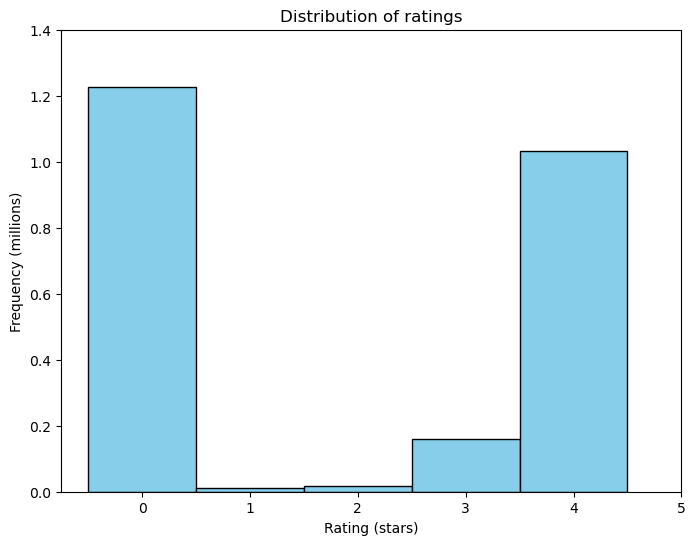

In [30]:
# Plot the histogram for the "star" series
plt.figure(figsize=(8, 6))  # Adjust the figure size
counts, bins, patches = plt.hist(df['stars'], bins=range(0, 6), color='skyblue', edgecolor='black', align='left')

# Rescale the y-axis to represent the frequency in millions
plt.gca().set_yticks(plt.gca().get_yticks())  # Get current tick positions
plt.gca().set_yticklabels([f'{y/1e6:.1f}' for y in plt.gca().get_yticks()])  # Format the ticks as decimal numbers

# Add titles and labels
plt.title('Distribution of ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Frequency (millions)')
plt.xticks(range(0, 6))  # Set x-ticks to match possible star ratings

# Display the histogram
plt.show()